# Undersatanding PubMed GitHub repositories with the Software Gardening Almanack

The content below seeks to better understand a dataset of ~10,000 PubMed article GitHub repositories using the Software Gardening Almanack.

PubMed GitHub repositories are extracted using the PubMed API to query for GitHub links within article abstracts.
GitHub data about these repositories is gathered using the GitHub API.
The code to perform data extractions may be found under the directory: [gather-pubmed-repos](https://github.com/software-gardening/almanack/tree/main/src/book/seed-bank/pubmed-github-repositories/gather-pubmed-repos/) .

These repositories are then processed using the Software Gardening Almanack to contextualize how they compare to one another.

## Data Extraction

The following section extracts data which includes software entropy and GitHub-derived data.
We merge the data to form a table which includes PubMed, GitHub, and Almanack software entropy information on the repositories.

In [4]:
import pathlib
from concurrent.futures import ThreadPoolExecutor

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from IPython.display import Image, display

from almanack import process_repositories_batch

# set plotly default theme
pio.templates.default = "plotly_white"

# set almanack data directory
ALMANACK_DATA_DIR = "repository_analysis_results"

In [7]:
repo_urls=pd.read_parquet(
            path="gather-pubmed-repos/pubmed_github_links_with_github_data.parquet",
            columns=["github_link"],
        ).dropna()
repo_urls

,github_link
0,https://github.com/theislab/Scanpy
1,https://github.com/theislab/anndata
2,https://github.com/WormBase/scdefg
3,https://github.com/WormBase/wormcells-viz
4,https://github.com/abacus-gene/paml
...,...
10201,https://github.com/tee-lab/MOTHe-GUI
10202,https://github.com/Roth-Lab/SpatialSort
10203,https://github.com/jianghruc/scHoML
10204,https://github.com/ZhonghuiGu/HEAL


In [2]:
# if we don't already have a data dir, batch process almanack data
if not pathlib.Path(ALMANACK_DATA_DIR).is_dir():
    process_repositories_batch(
        # read pre-collected pubmeb github repos
        repo_urls=pd.read_parquet(
            path="gather-pubmed-repos/pubmed_github_links_with_github_data.parquet",
            columns=["github_link"],
        )
        .dropna()
        .github_link.tolist()[1:20],
        output_path=ALMANACK_DATA_DIR,
        split_batches=True,
        batch_size=500,
        max_workers=8,
        collect_dataframe=False,
        show_repo_progress=False,
        show_batch_progress=True,
        executor_cls=ThreadPoolExecutor,
    )
df = pd.read_parquet(path=ALMANACK_DATA_DIR)
df.head()

[batch 1] processing 5 repos (1-5/19)
[batch 2] processing 5 repos (6-10/19)
[batch 3] processing 5 repos (11-15/19)
[batch 4] processing 4 repos (16-19/19)


,Repository URL,repo-path,repo-commits,repo-file-count,repo-commit-time-range,repo-days-of-development,repo-commits-per-day,almanack-table-datetime,almanack-version,repo-primary-language,...,repo-days-between-last-coverage-run-latest-commit,repo-code-coverage-total-lines,repo-code-coverage-executed-lines,repo-agg-info-entropy,repo-almanack-score_json,repo-packages-ecosystems_json,repo-social-media-platforms_json,checks_total,checks_passed,checks_pct
0,https://github.com/WormBase/scdefg,/private/var/folders/zw/l3g4vq6508g98qkt05z6hb...,103,18,"('2021-01-29', '2022-02-02')",370,0.278378,2025-12-04T19:19:00.157977Z,0.1.10.post19.dev0+83c6cfe,Python,...,None,None,None,0.153966,"{""almanack-score-numerator"": 5, ""almanack-scor...",[],[],11,5,45.454545
1,https://github.com/abacus-gene/paml,/private/var/folders/zw/l3g4vq6508g98qkt05z6hb...,80,220,"('2014-04-13', '2025-09-04')",4163,0.019217,2025-12-04T19:19:00.157977Z,0.1.10.post19.dev0+83c6cfe,C,...,None,None,None,0.020901,"{""almanack-score-numerator"": 5, ""almanack-scor...",[],[],11,5,45.454545
2,https://github.com/theislab/anndata,/private/var/folders/zw/l3g4vq6508g98qkt05z6hb...,1620,216,"('2017-08-11', '2025-12-02')",3036,0.533597,2025-12-04T19:19:00.157977Z,0.1.10.post19.dev0+83c6cfe,Python,...,None,None,None,0.028931,"{""almanack-score-numerator"": 7, ""almanack-scor...","[""pypi""]",[],11,7,63.636364
3,https://github.com/abacus-gene/paml-tutorial,/private/var/folders/zw/l3g4vq6508g98qkt05z6hb...,46,341,"('2021-12-29', '2025-05-18')",1237,0.037187,2025-12-04T19:19:00.157977Z,0.1.10.post19.dev0+83c6cfe,HTML,...,None,None,None,0.018154,"{""almanack-score-numerator"": 6, ""almanack-scor...",[],[],11,6,54.545455
4,https://github.com/WormBase/wormcells-viz,/private/var/folders/zw/l3g4vq6508g98qkt05z6hb...,164,67,"('2021-03-19', '2023-11-30')",987,0.166160,2025-12-04T19:19:00.157977Z,0.1.10.post19.dev0+83c6cfe,None,...,None,None,None,0.025155,"{""almanack-score-numerator"": 3, ""almanack-scor...",[],[],11,3,27.272727


In [ ]:
# fix errors with 0 time of existence and normalized entropy
df = df.dropna(subset=["Time of Existence (days)", "Normalized Total Entropy"])
df

## What languages are used within PubMed article repositories?

The following section observes the top 10 languages which are used in repositories from the dataset.
Primary language is determined as the language which has the most lines of code within a repository.

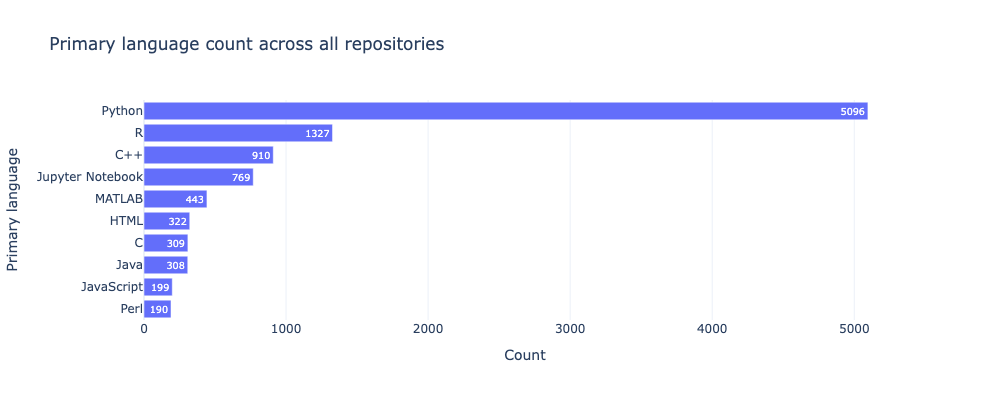

In [2]:
language_grouped_data = (
    df.groupby(["Primary language"]).size().reset_index(name="Count")
)

# Create a horizontal bar chart
fig_languages = px.bar(
    language_grouped_data.sort_values(by="Count")[-10:],
    y="Primary language",
    x="Count",
    text="Count",
    orientation="h",
    width=700,
    height=400,
    title="Primary language count across all repositories",
)

fig_languages.show()

## How is software entropy different across primary languages?

The following section explores how software entropy manifests differently across different primary languages for repositories.

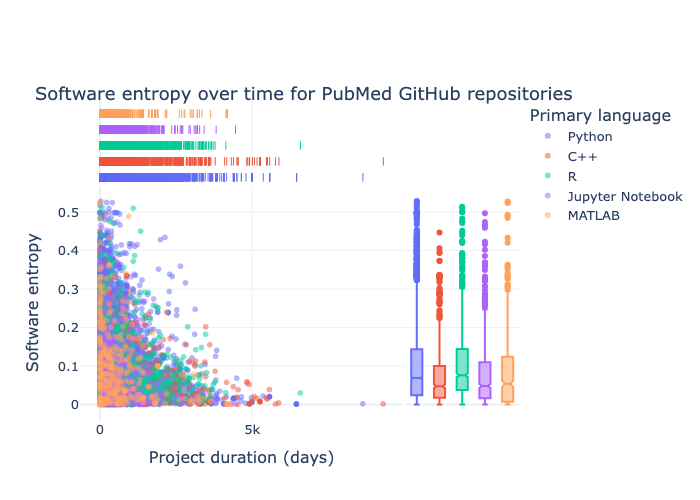

In [3]:
fig = px.scatter(
    df[
        df["Primary language"].isin(
            language_grouped_data.sort_values(by="Count")[-5:]["Primary language"]
        )
    ],
    x="Time of Existence (days)",
    y="Normalized Total Entropy",
    hover_data=["Repository URL"],
    width=700,
    height=400,
    title="Software entropy over time for PubMed GitHub repositories",
    marginal_x="rug",
    marginal_y="box",
    opacity=0.5,
    color="Primary language",
)

fig.update_layout(
    font=dict(size=13),
    title={"yref": "container", "y": 0.8, "yanchor": "bottom"},
    xaxis_title="Project duration (days)",
    yaxis_title="Software entropy",
)
fig.write_image(image_file := "images/software-information-entropy-top-5-langs.png")
display(Image(filename=image_file))

## What is the relationship between GitHub Stars and Forks for repositories?

We next explore how GitHub Stars and Forks are related within the repositories.

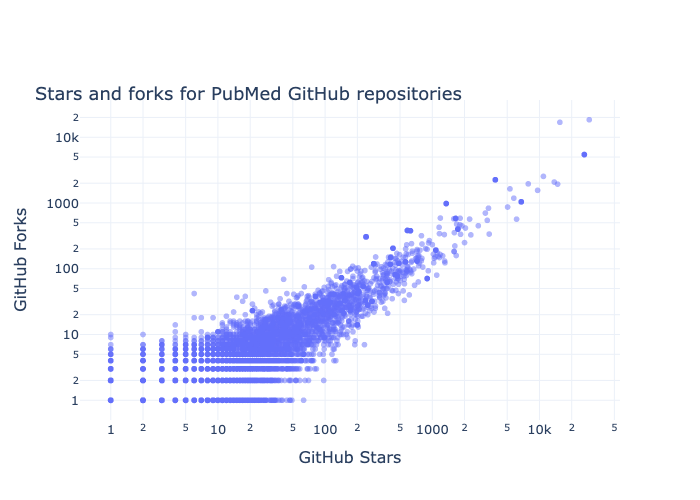

In [4]:
fig = px.scatter(
    df,
    x="GitHub Stars",
    y="GitHub Forks",
    hover_data=["Repository URL"],
    width=700,
    height=400,
    title="Stars and forks for PubMed GitHub repositories",
    opacity=0.5,
    log_y=True,
    log_x=True,
)

fig.update_layout(
    font=dict(size=13),
    title={"yref": "container", "y": 0.8, "yanchor": "bottom"},
    xaxis_title="GitHub Stars",
    yaxis_title="GitHub Forks",
)
fig.write_image(image_file := "images/pubmed-stars-and-forks.png")
display(Image(filename=image_file))

## How do GitHub Stars, software entropy, and time relate?

The next section explores how GitHub Stars, software entropy, and time relate to one another.

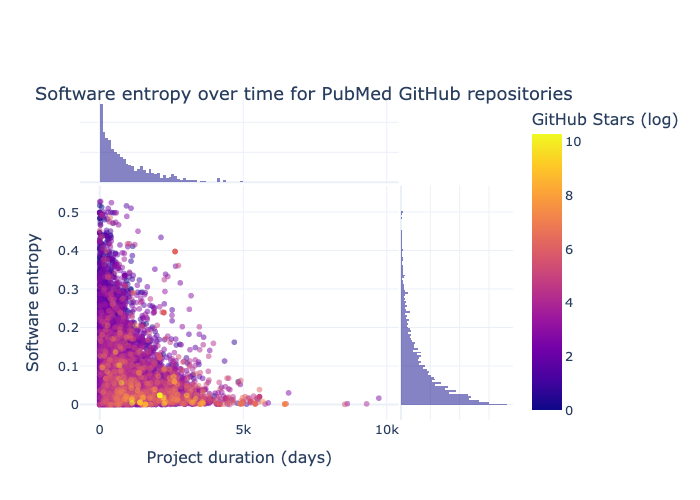

In [5]:
df["GitHub Stars (log)"] = np.log(
    df["GitHub Stars"].apply(
        # move 0's to None to avoid divide by 0
        lambda x: x if x > 0 else None
    )
)

fig = px.scatter(
    df.dropna(subset="GitHub Stars (log)").sort_values(by="GitHub Stars (log)"),
    x="Time of Existence (days)",
    y="Normalized Total Entropy",
    hover_data=["Repository URL"],
    width=700,
    height=400,
    title="Software entropy over time for PubMed GitHub repositories",
    marginal_x="histogram",
    marginal_y="histogram",
    opacity=0.5,
    color="GitHub Stars (log)",
)

fig.update_layout(
    font=dict(size=13),
    title={"yref": "container", "y": 0.8, "yanchor": "bottom"},
    xaxis_title="Project duration (days)",
    yaxis_title="Software entropy",
)
fig.write_image(image_file := "images/software-information-entropy-gh-stars.png")
display(Image(filename=image_file))

## How do GitHub Forks, software entropy, and time relate?

The next section explores how GitHub Forks, software entropy, and time relate to one another.

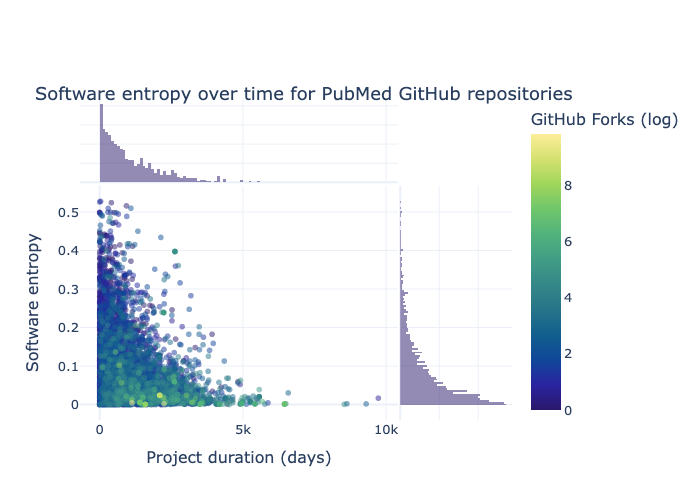

In [6]:
df["GitHub Forks (log)"] = np.log(
    df["GitHub Forks"].apply(
        # move 0's to None to avoid divide by 0
        lambda x: x if x > 0 else None
    )
)

fig = px.scatter(
    df.dropna(subset="GitHub Forks (log)").sort_values(by="GitHub Forks (log)"),
    x="Time of Existence (days)",
    y="Normalized Total Entropy",
    hover_data=["Repository URL"],
    width=700,
    height=400,
    title="Software entropy over time for PubMed GitHub repositories",
    marginal_x="histogram",
    marginal_y="histogram",
    opacity=0.5,
    color="GitHub Forks (log)",
    color_continuous_scale=px.colors.sequential.haline,
)

fig.update_layout(
    font=dict(size=13),
    title={"yref": "container", "y": 0.8, "yanchor": "bottom"},
    xaxis_title="Project duration (days)",
    yaxis_title="Software entropy",
)
fig.write_image(image_file := "images/software-information-entropy-forks.png")
display(Image(filename=image_file))

## What is the relationship between GitHub Stars and Open Issues for the repositories?

Below we explore how GitHub Stars and Open Issues are related for the repositories.

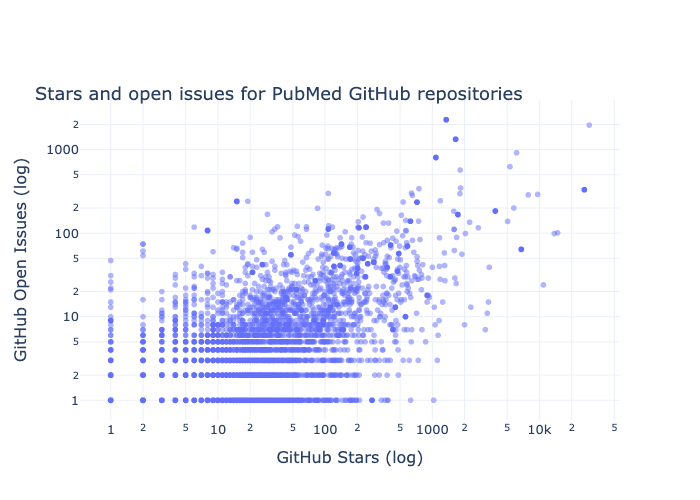

In [7]:
df["GitHub Open Issues (log)"] = np.log(
    df["GitHub Open Issues"].apply(
        # move 0's to None to avoid divide by 0
        lambda x: x if x > 0 else None
    )
)

fig = px.scatter(
    df,
    x="GitHub Stars",
    y="GitHub Open Issues",
    hover_data=["Repository URL"],
    width=700,
    height=400,
    title="Stars and open issues for PubMed GitHub repositories",
    opacity=0.5,
    log_y=True,
    log_x=True,
)

fig.update_layout(
    font=dict(size=13),
    title={"yref": "container", "y": 0.8, "yanchor": "bottom"},
    xaxis_title="GitHub Stars (log)",
    yaxis_title="GitHub Open Issues (log)",
)
fig.write_image(image_file := "images/pubmed-stars-and-open-issues.png")
display(Image(filename=image_file))

## How do software entropy, time, and GitHub issues relate to one another?

The next section visualizes how software entropy, time, and GitHub issues relate to one another.

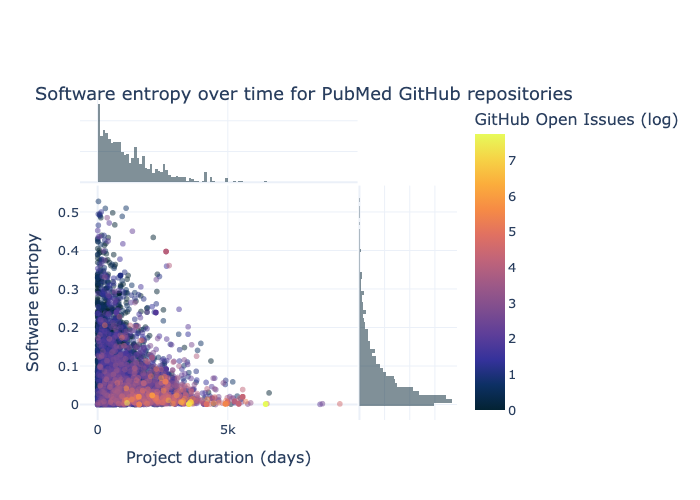

In [8]:
df["GitHub Open Issues (log)"] = np.log(
    df["GitHub Open Issues"].apply(
        # move 0's to None to avoid divide by 0
        lambda x: x if x > 0 else None
    )
)

fig = px.scatter(
    df.dropna(subset="GitHub Open Issues (log)").sort_values(
        by="GitHub Open Issues (log)"
    ),
    x="Time of Existence (days)",
    y="Normalized Total Entropy",
    hover_data=["Repository URL"],
    width=700,
    height=400,
    title="Software entropy over time for PubMed GitHub repositories",
    marginal_x="histogram",
    marginal_y="histogram",
    opacity=0.5,
    color="GitHub Open Issues (log)",
    color_continuous_scale=px.colors.sequential.thermal,
)

fig.update_layout(
    font=dict(size=13),
    title={"yref": "container", "y": 0.8, "yanchor": "bottom"},
    xaxis_title="Project duration (days)",
    yaxis_title="Software entropy",
)
fig.write_image(image_file := "images/software-information-entropy-open-issues.png")
display(Image(filename=image_file))

```{bibliography}
---
style: unsrt
filter: docname in docnames
labelprefix: SB
---
```